In [1]:
######## generate some data  ###################
import pandas as pd
import numpy as np

# Define the number of rows and columns
num_rows = 20
columns = ['Name', 'Age', 'Country', 'Salary']

# Generate random meaningful data
np.random.seed(42)  # For reproducibility
names = ['John', 'Emma', 'Michael', 'Sophia', 'Daniel', 'Olivia', 'Matthew', 'Ava', 'James', 'Isabella',
         'Henry', 'Mia', 'Alexander', 'Charlotte', 'William', 'Amelia', 'Benjamin', 'Harper', 'Lucas', 'Evelyn']
ages = np.random.randint(22, 60, size=num_rows)
countries = ['USA', 'UK', 'Canada', 'Australia', 'Germany', 'France', 'Spain', 'Italy', 'Netherlands', 'Sweden',
             'Norway', 'Denmark', 'Finland', 'Switzerland', 'Ireland', 'Belgium', 'Austria', 'Portugal', 'Greece', 'Poland']
salaries = np.random.randint(30000, 120000, size=num_rows)

# Create the dataframe
data = {
    'Name': names,
    'Age': ages,
    'Country': np.random.choice(countries, num_rows),
    'Salary': salaries
}
df = pd.DataFrame(data)

In [2]:
# upload the data
from cleanlab_studio import Studio
studio = Studio(<YOUR_API_KEY>)

In [3]:
dataset_id: str = studio.upload_dataset(df, "name_age_contry_salary")


Uploading dataset...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|
Ingesting Dataset...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|


In [4]:
# create enrichment project
enrichment_project = studio.create_enrichment_project(name="aaron_enrichment_demo2", dataset_id=dataset_id)

enrichment_project.id

'8a96b266eef74cb1b86bb02dbd0f72f0'

In [1]:
# We can also load a project from the server
from cleanlab_studio import Studio
studio = Studio(<YOUR_API_KEY>)
enrichment_project = studio.get_enrichment_project("8a96b266eef74cb1b86bb02dbd0f72f0")

# construct preview inputs
from cleanlab_studio.studio.enrichment import EnrichmentOptions

# EnrichmentOptions can be used for both Preview and Run. After users are satisfied with the preview result,
# they can use the same EnrichmentOptions object to enrich the entire dataset.
enrichment_options = EnrichmentOptions(
    prompt="Is ${Country} a part of Europe?",
    constrain_outputs=["Yes", "No"],
    quality_preset="low",
    # regex = ...
    # tlm_options = ...
)


In [4]:
# doing the preview.
preview_result = enrichment_project.preview(options=enrichment_options, new_column_name="Is_in_Europe")
preview_result
preview_result.details()


,Is_in_Europe,Is_in_Europe_log,Is_in_Europe_raw,Is_in_Europe_trustworthiness_score
row_id,,,,
2,Yes,None,Yes,0.988472
7,Yes,None,Yes,0.959141
8,Yes,None,Yes,0.998560


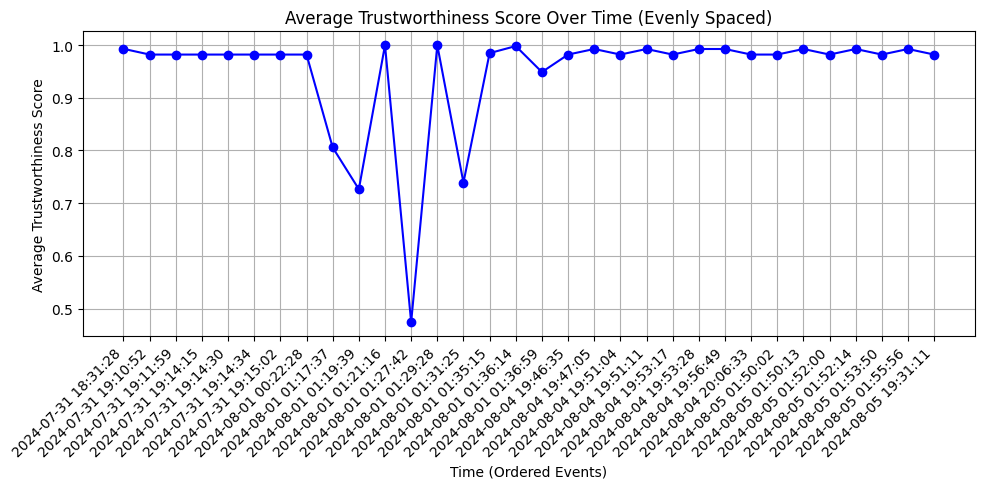

In [5]:
# one can do a lot of experiments with preview and find the average score across different runs
enrichment_project.show_trustworthiness_score_history()

In [6]:
# when you happy with the preview result, you can do the real deal - enrich all rows in the dataset.  
# this is the async call, you will get the job_id only.
result_id = enrichment_project.run(options=enrichment_options, new_column_name="Is_in_Europe")
result_id

{'job_id': 'bc8fce0c33714328bba14b68a9494425'}

In [7]:
# checking the status
enrichment_project.ready

False

In [8]:
# wait until it's ready
enrichment_project.wait_until_ready()

In [9]:
# when it's ready, you can get the results
result = enrichment_project.download_results()

In [10]:
# The result has details() and join() method to use
result.details()

,Is_in_Europe,Is_in_Europe_log,Is_in_Europe_raw,Is_in_Europe_trustworthiness_score
0,Yes,None,Yes,0.994645
1,Yes,None,Yes,0.988773
2,Yes,None,Yes,0.988472
3,No,None,No,0.997339
4,Yes,None,Yes,0.996838
5,Yes,None,Yes,0.988472
6,Yes,None,Yes,0.994645
7,Yes,None,Yes,0.959141
8,Yes,None,Yes,0.998560
9,Yes,None,Yes,0.997618


In [12]:
# join the results and the original data
result.join(df)

,Name,Age,Country,Salary,Is_in_Europe,Is_in_Europe_log,Is_in_Europe_raw,Is_in_Europe_trustworthiness_score
0,John,50,Netherlands,83707,Yes,None,Yes,0.994645
1,Emma,36,Spain,115305,Yes,None,Yes,0.988773
2,Michael,29,Portugal,58693,Yes,None,Yes,0.988472
3,Sophia,42,Australia,101932,No,None,No,0.997339
4,Daniel,40,Switzerland,55658,Yes,None,Yes,0.996838
5,Olivia,44,Portugal,114478,Yes,None,Yes,0.988472
6,Matthew,32,Netherlands,48431,Yes,None,Yes,0.994645
7,Ava,32,UK,32747,Yes,None,Yes,0.959141
8,James,45,Poland,89150,Yes,None,Yes,0.998560
9,Isabella,57,Ireland,95725,Yes,None,Yes,0.997618


In [2]:
# another way is to download the data as csv file, it includes original dataset for better ux
enrichment_project.export_results_as_csv()

Results exported successfully at ./enrichment_results_bc8fce0c33714328bba14b68a9494425.csv
